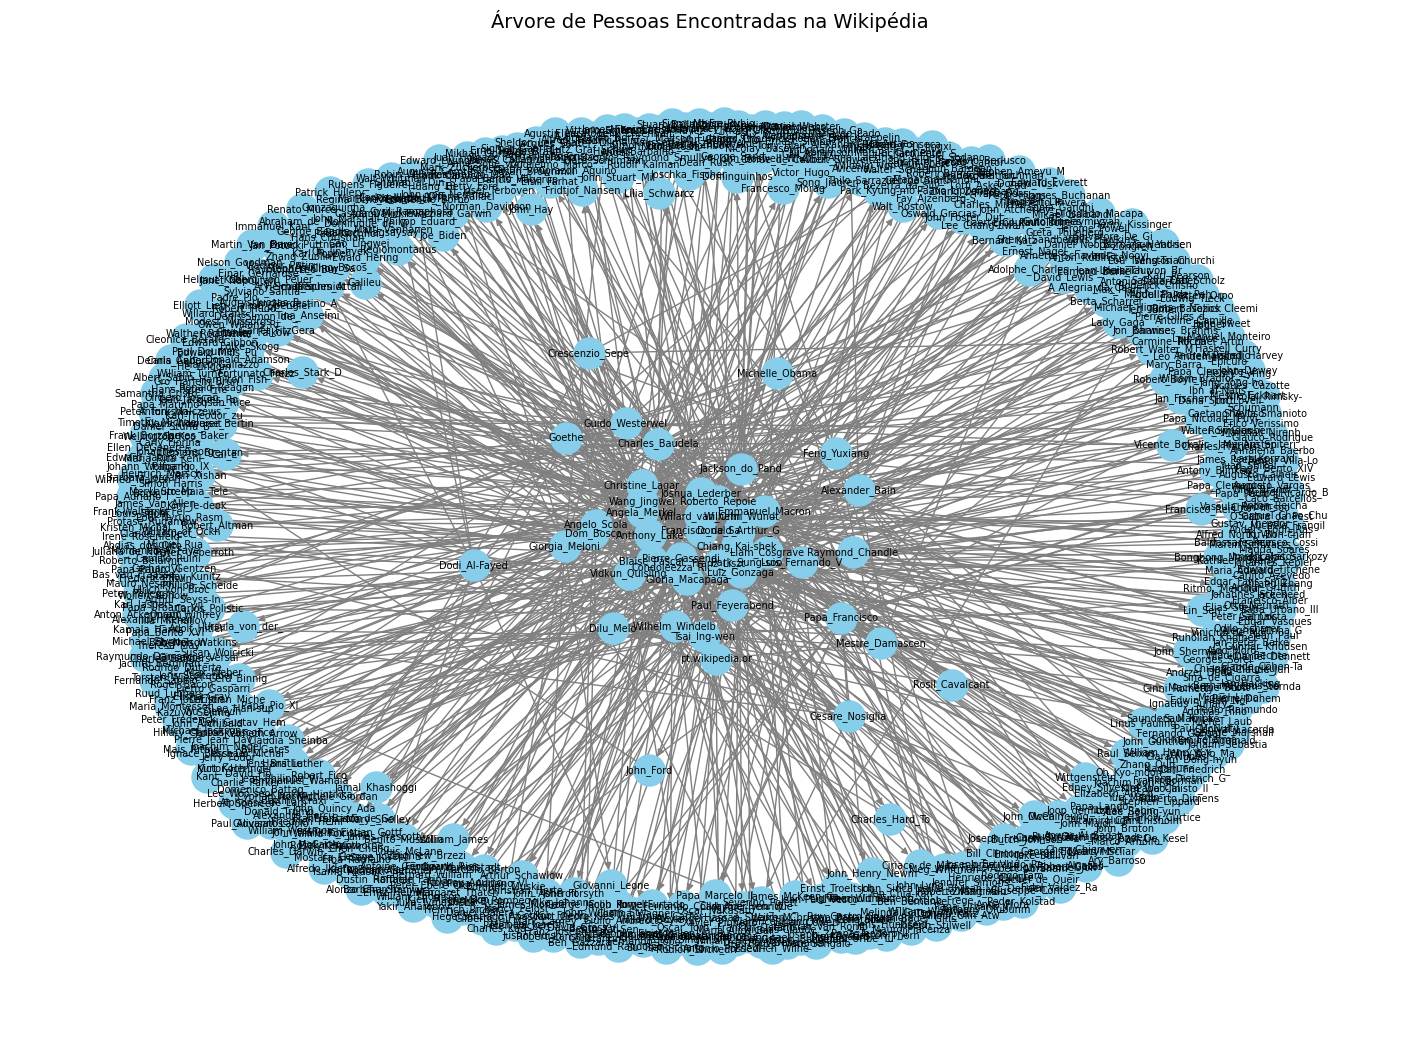

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def carregar_arvore_txt(caminho="data/arvore_links.txt"):
    G = nx.DiGraph()
    with open(caminho, "r", encoding="utf-8") as f:
        for linha in f:
            if "->" in linha:
                pai, filho = linha.strip().split("->")
                pai, filho = pai.strip(), filho.strip()
                G.add_edge(pai, filho)
    return G

def plotar_arvore(G):
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    nx.draw(
        G, pos,
        with_labels=False,
        node_size=500,
        node_color="skyblue",
        edge_color="gray",
        arrows=True
    )

    labels = {n: n.split("/")[-1][:15] for n in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=7)

    plt.title("Árvore de Pessoas Encontradas na Wikipédia", fontsize=14)
    plt.show()


G = carregar_arvore_txt("data/arvore_links.txt")
plotar_arvore(G)


In [3]:
def grau_de_separacao(G, pessoa1, pessoa2):
    try:
        caminho = nx.shortest_path(G, source=pessoa1, target=pessoa2)
        grau = len(caminho) - 1
        return grau, caminho
    except nx.NetworkXNoPath:
        return None, []
    except nx.NodeNotFound as e:
        print(f"Erro: {e}")
        return None, []



pessoa1 = "https://pt.wikipedia.org/wiki/Dom_Bosco"
pessoa2 = "https://pt.wikipedia.org/wiki/Papa_Paulo_VI"

grau, caminho = grau_de_separacao(G, pessoa1, pessoa2)

if grau is not None:
    print(f"Grau de separação entre:\n{pessoa1}\n{pessoa2}\n")
    print(f"➡ Grau: {grau}")
    print("➡ Caminho:")
    for p in caminho:
        print("   ", p)
else:
    print("Não existe conexão entre essas pessoas.")

Grau de separação entre:
https://pt.wikipedia.org/wiki/Dom_Bosco
https://pt.wikipedia.org/wiki/Papa_Paulo_VI

➡ Grau: 2
➡ Caminho:
    https://pt.wikipedia.org/wiki/Dom_Bosco
    https://pt.wikipedia.org/wiki/Miguel_Rua
    https://pt.wikipedia.org/wiki/Papa_Paulo_VI
